# Spam Detection using Naive Bayes

## Import Dependencies

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
from warnings import simplefilter
simplefilter(action='ignore')

## Data loading and inspection

In [12]:
df = pd.read_csv(r"spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
df.columns

Index(['Category', 'Message'], dtype='object')

## Exploratory Data Analysis

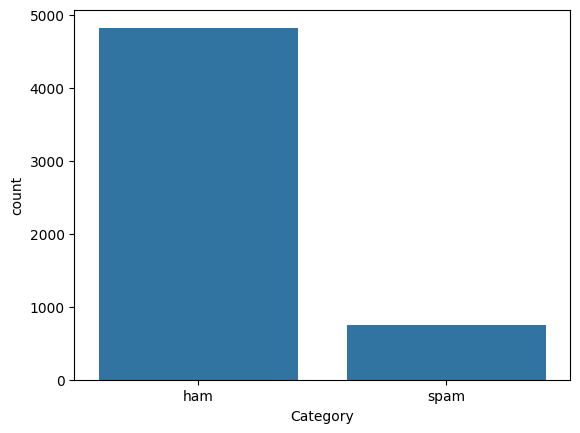

In [16]:
sns.countplot(data=df, x='Category')
plt.show()

In [17]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

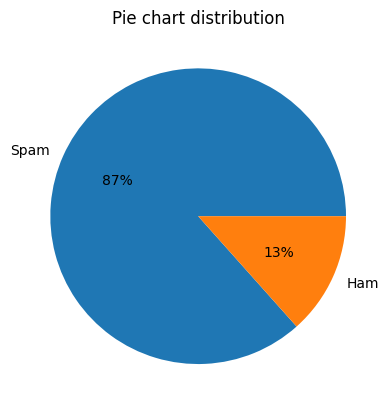

In [18]:
plt.pie(x=df['Category'].value_counts(), labels=['Spam', 'Ham'], autopct='%1.0f%%')
plt.title('Pie chart distribution')
plt.show()

## Generate and Visualize word clouds for each unique category

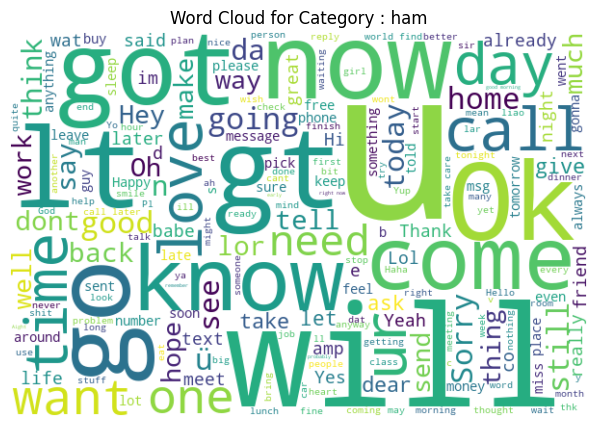

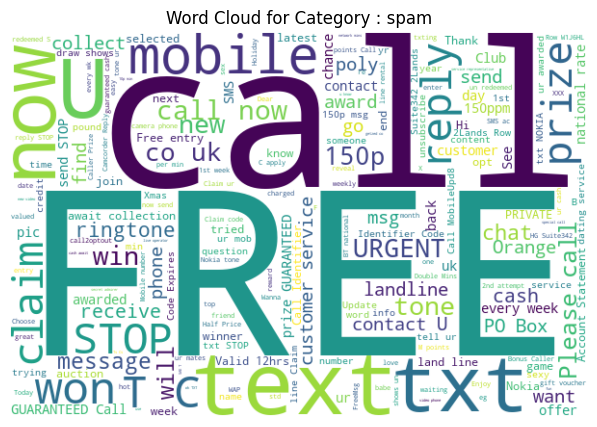

In [19]:
for category in df['Category'].unique() :
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'])

    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category : {category}')
    plt.axis('off')
    plt.show()

## Text Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X = vect.fit_transform(df['Message'])
Y = df['Category']

In [21]:
vect.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

## Handling Imbalance

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [23]:
print(X_resampled)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 205937 stored elements and shape (9650, 8709)>
  Coords	Values
  (0, 3567)	0.14786475068980162
  (0, 8080)	0.2300034410835773
  (0, 4370)	0.32645117023873077
  (0, 5954)	0.25533539230157154
  (0, 2334)	0.25281395947472957
  (0, 1313)	0.24417482890859654
  (0, 5567)	0.156366230319576
  (0, 4110)	0.10707657674366398
  (0, 1763)	0.2757872678027423
  (0, 3651)	0.1803318063070826
  (0, 8544)	0.22081883351949952
  (0, 4497)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 2057)	0.2757872678027423
  (0, 7690)	0.15550627816331297
  (0, 3611)	0.15304155020494287
  (0, 1079)	0.32645117023873077
  (0, 8320)	0.18240101628302693
  (1, 5534)	0.2718944069420321
  (1, 4533)	0.4083258549263009
  (1, 4338)	0.5236804332035243
  (1, 8446)	0.43162957585464123
  (1, 5563)	0.5466243141314314
  (2, 4110)	0.07913674465201573
  (2, 3369)	0.11310793123981583
  :	:
  (9649, 2467)	0.05776270390831071
  (9649, 4279)	0.14488153363047251
  (9649, 2

In [24]:
y_resampled.shape

(9650,)

## Train_Test_Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7237, 8709), (2413, 8709), (7237,), (2413,))

## Model Building - NaiveBayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

## Model Evaluation

In [30]:
model.score(X_test,y_test)

0.986738499792789

In [34]:
cls = classification_report(y_test, model.predict(X_test))
print(cls)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1208
        spam       0.99      0.99      0.99      1205

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



In [35]:
con_mat = confusion_matrix(y_test, model.predict(X_test))
print(con_mat)

[[1191   17]
 [  15 1190]]


Text(95.72222222222221, 0.5, 'Y_Pred')

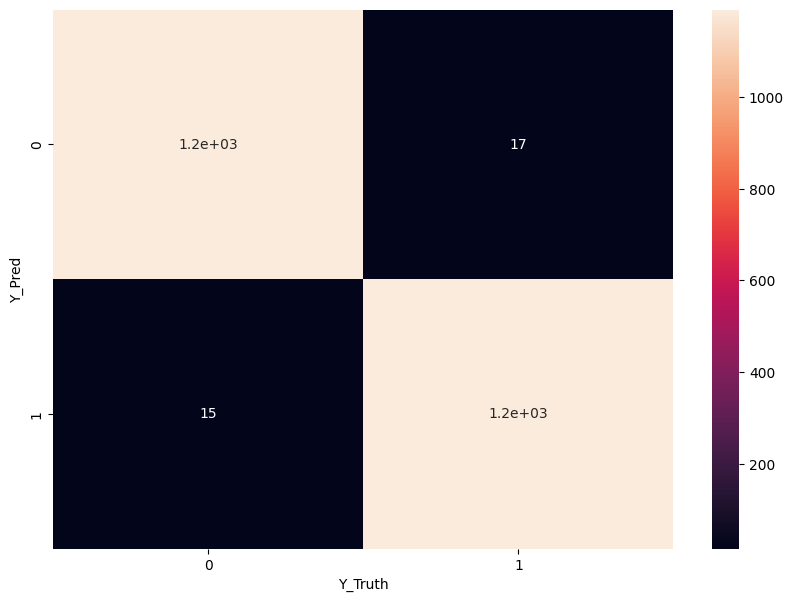

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(con_mat, annot=True)
plt.xlabel('Y_Truth')
plt.ylabel('Y_Pred')